In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#hypothesis
#ELA (English Language Acquisition) status will be an important piece in understanding test scores

In [20]:
# Loading the data in long format (each respondent has one row per response)
data=pd.read_csv('Report.csv')
#elaDummies = pd.get_dummies(data["ca_elastatus"])
#data = data.append(elaDummies)
print(data.shape)
print(data.columns)


(940, 18)
Index(['student_number', 'grade_level', 'ca_elastatus', 'Race', 'Zip', 'E1',
       'E2', 'E3', 'M1', 'M2', 'M3', 'Days Attended', 'Days Absent 2018-2019',
       'Days Enrolled 2018-2019', 'Attendance Rate 2018-2019',
       'Absent Rate 2018-2019', 'Current English Grade', 'Current Math Grade'],
      dtype='object')


In [4]:
data= data.fillna(0)

In [26]:
def conditions(x):
    if (x == 'A' or x == 'A-'):
        return 1
    elif (x == 'B' or x == 'B+' or x == 'B-'):
        return 2
    elif (x == 'C' or x == 'C+' or x == 'C-'):
        return 3
    elif (x == 'D' or x == 'D-' or x == 'D+'):
        return 4
    elif (x == 'F'):
        return 5
    else:
        return 0

func = np.vectorize(conditions)
gradeDummies = func(data["Current English Grade"])
data["S1EngGrade"] = gradeDummies

In [27]:
def conditionsEla(x):
    if x == 'EO':
        return 1
    elif x == 'EL':
        return 2
    elif x == 'IFEP':
        return 3
    elif x == 'RFEP':
        return 4
    

func = np.vectorize(conditionsEla)
elaDummies = func(data["ca_elastatus"])
data["elastatus"] = elaDummies

In [29]:
#data changed here
data["absentrate"] = data["Days Absent 2018-2019"]
#data["E1"] = data["EnglishScoreCurrent"]
#data["E2"] = data["EnglishScoreLast"]
#data["M1"] = data["MathScoreCurrent"]
#data["M2"] = data["MathScoreLast"]
X = data[["student_number","grade_level", "absentrate", "E1", "E2", 'E3'
         , "M1", "M2", "M3", "Zip", "S1EngGrade", "elastatus"]]

In [30]:
X.head()

,student_number,grade_level,absentrate,E1,E2,E3,M1,M2,M3,Zip,S1EngGrade,elastatus
0,1021777,6,0,0,0,0,0,0,0,92227.0,0,1
1,1020537,6,1,0,0,0,0,0,0,92227.0,0,2
2,1023536,6,2,0,0,0,0,0,0,92227.0,0,1
3,1021353,6,11,0,0,0,0,0,0,92227.0,0,2
4,1022551,6,5,0,0,0,0,0,0,92227.0,0,1


In [32]:
#and here data changed
X["E1"] = np.where(X["E1"] == ' ', 0, X["E1"]).astype("int")

X["E2"] = np.where(X["E2"] == ' ', 0, X["E2"]).astype("int")

X["E3"] = np.where(X["E3"] == ' ', 0, X["E3"]).astype("int")

X["M1"] = np.where(X["M1"] == ' ', 0, X["M1"]).astype("int")

X["M2"] = np.where(X["M2"] == ' ', 0, X["M2"]).astype("int")

X["M3"] = np.where(X["M3"] == ' ', 0, X["M3"]).astype("int")

c:\users\sakok\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\sakok\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\sakok\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [33]:
X_norm = (X - X.mean()) / (X.max() - X.min())

In [34]:
X_norm.iloc[18,]

student_number   -0.769932
grade_level      -0.248404
absentrate        0.041578
E1               -0.400798
E2               -0.419947
E3               -0.488564
M1               -0.367287
M2               -0.388830
M3               -0.424468
Zip              -0.005364
S1EngGrade       -0.124043
elastatus         0.632624
Name: 18, dtype: float64

In [35]:
# Multilevel models expect data in a long format, with multiple rows per person.  Restructing data:
E_long=pd.wide_to_long(X, ['E',], i='student_number', j='Year')
E_long=E_long.reset_index()
print(E_long.head())

E_long=E_long.dropna()

# Multilevel models expect data in a long format, with multiple rows per person.  Restructing data:
#M_long=pd.wide_to_long(X, ['M',], i='student_number', j='Year')
#M_long=M_long.reset_index()
#print(M_long.head())

#M_long=M_long.dropna()

   student_number  Year  grade_level  absentrate  M1  S1EngGrade  M2  M3  \
0         1021777     1            6           0   0           0   0   0   
1         1020537     1            6           1   0           0   0   0   
2         1023536     1            6           2   0           0   0   0   
3         1021353     1            6          11   0           0   0   0   
4         1022551     1            6           5   0           0   0   0   

   elastatus      Zip  E  
0          1  92227.0  0  
1          2  92227.0  0  
2          1  92227.0  0  
3          2  92227.0  0  
4          1  92227.0  0  


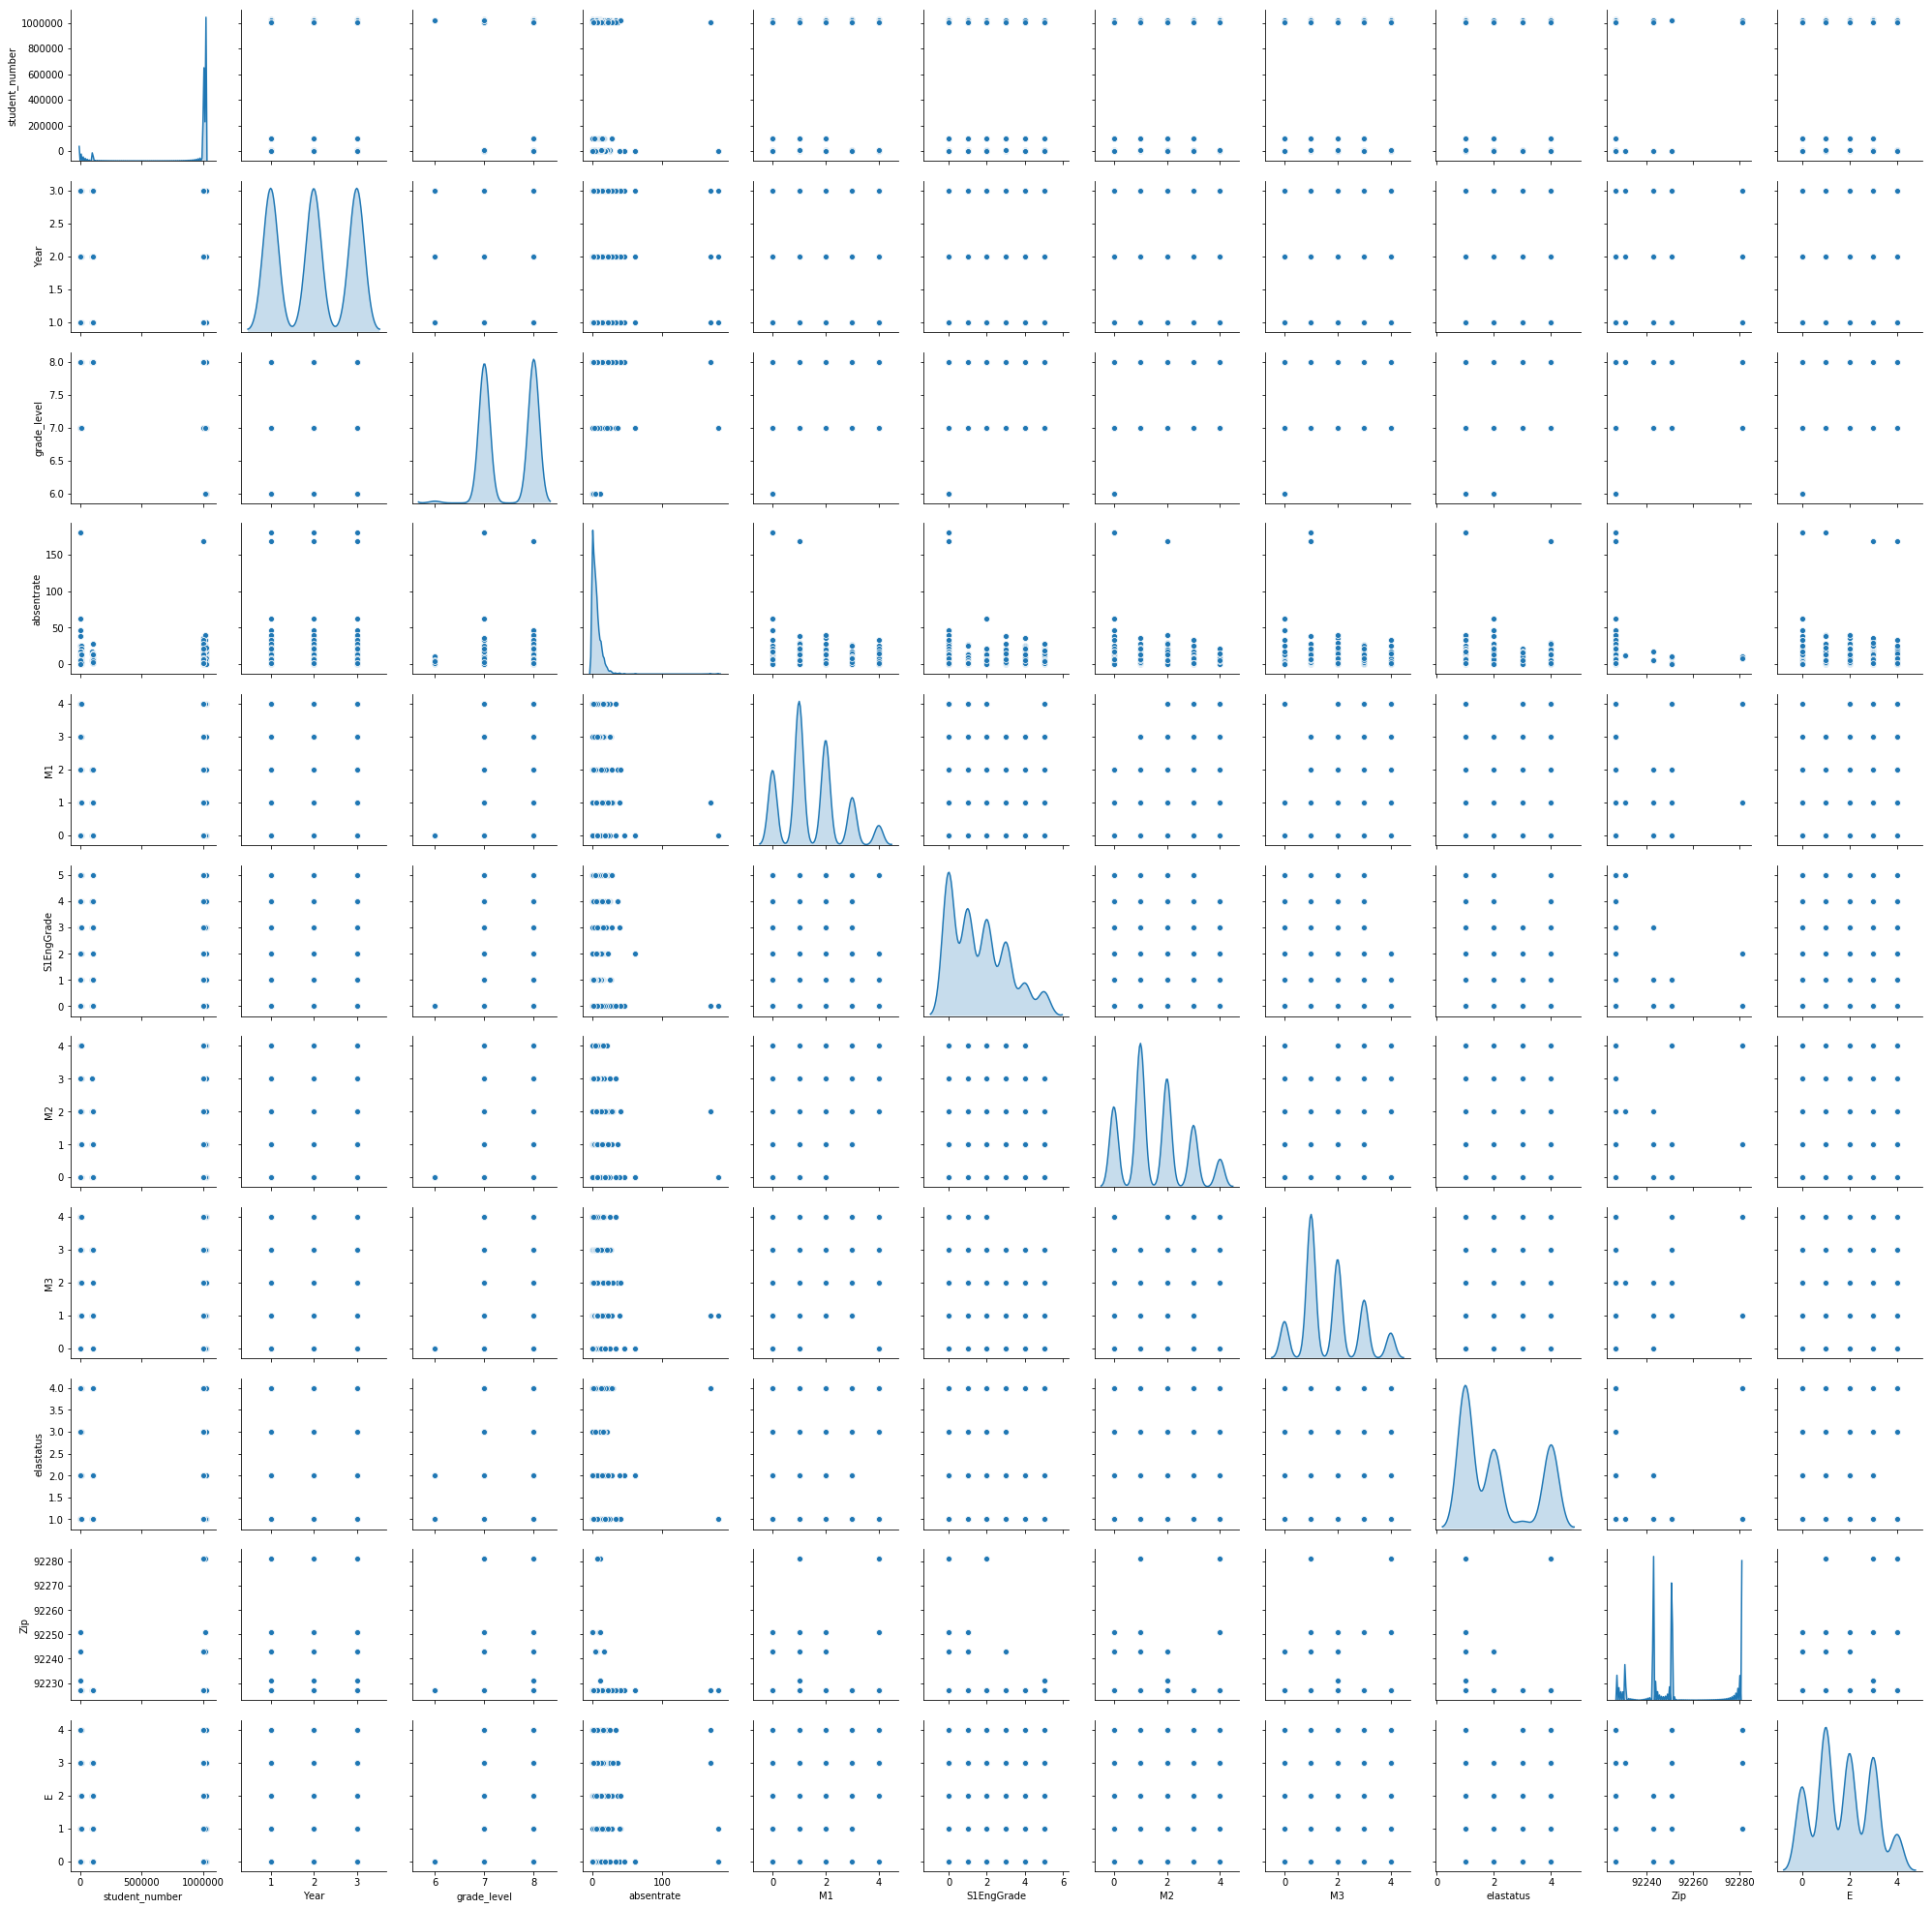

In [36]:
sns.pairplot(E_long, diag_kind="kde")

Absent Rate
Mean: 6.489882854100107
Median: 5.0
Max: 180
Min: 0


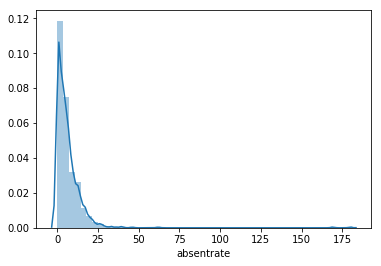

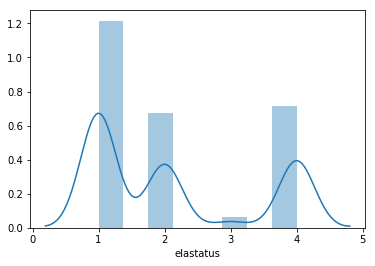

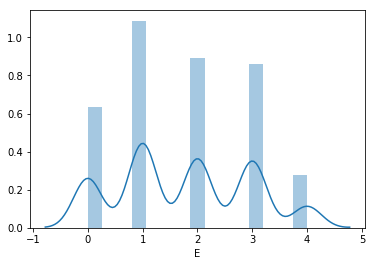

In [37]:
# Getting a sense for the data

# Checking the distributions: Is the outcome normally distributed, or close to it?
print("Absent Rate")
print("Mean:",E_long["absentrate"].mean())
print("Median:",E_long["absentrate"].median())
print("Max:",E_long["absentrate"].max())
print("Min:",E_long["absentrate"].min())

"Absent Rate"
sns.distplot(E_long["absentrate"])
plt.show()

"ELA Status"
sns.distplot(E_long["elastatus"])
plt.show()

"E"
sns.distplot(E_long["E"])
plt.show()
#E_long["M1"].hist()
#plt.show()



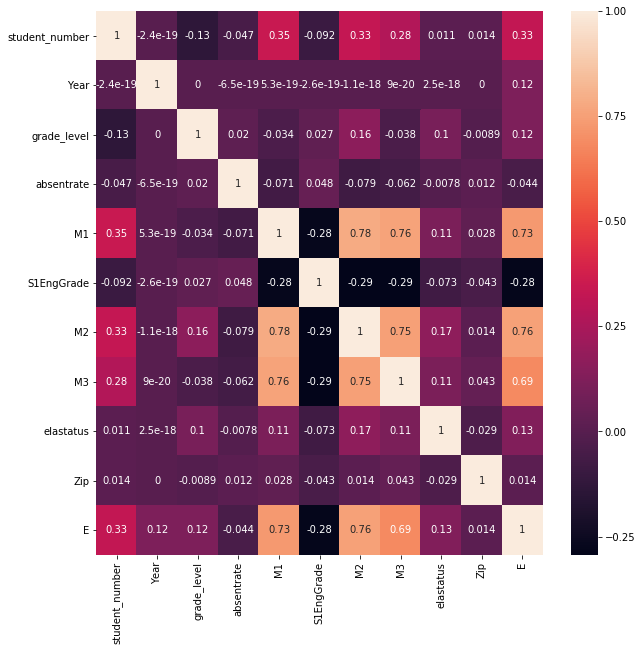

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(E_long.corr(), annot=True, ax=ax)

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

md = smf.mixedlm("elastatus ~ 1", E_long, groups=E_long["student_number"])

mdf = md.fit()

print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: elastatus 
No. Observations: 2817    Method:             REML      
No. Groups:       939     Scale:              0.0000    
Min. group size:  3       Likelihood:         17368.1956
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  2.103     0.023  89.975  0.000   2.057   2.149
Group Var  0.513  1629.634                               



In [44]:
print('running random intercept model')
ri_model = smf.mixedlm("elastatus ~ E",data=E_long,groups=E_long["student_number"])
ri_result = ri_model.fit(method='nm',maxiter=200, full_output=True)
print(ri_result.summary())
print("done!")

# Function to calculate the intraclass correlation
def ICC(fittedmodel):
    between_var= fittedmodel.cov_re.iloc[0,0]
    resid=fittedmodel.scale
    icc=between_var/(between_var+resid)
    return icc

print('The Intraclass Correlation is: {}'.format(ICC(result)))

running random intercept model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: elastatus 
No. Observations: 2817    Method:             REML      
No. Groups:       939     Scale:              0.0000    
Min. group size:  3       Likelihood:         29220.3269
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
--------------------------------------------------------
            Coef.   Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept   2.128       0.025 83.471 0.000  2.078  2.178
E           0.000       0.000  0.000 1.000 -0.000  0.000
Group Var   0.365 1047273.182                           

done!
The Intraclass Correlation is: 0.9999999999999989


In [47]:
print('running random slopes model')
rs_model = smf.mixedlm("E ~ elastatus",data=E_long,groups=E_long["student_number"], re_formula="~0+Year")
rs_result = rs_model.fit(method='nm',maxiter=200, full_output=True)
print(rs_result.summary())
print("done!")

print('running random intercept and random slopes model')
ris_model = smf.mixedlm("E ~ elastatus",data=E_long,groups=E_long["student_number"], re_formula="~Year")
ris_result = ris_model.fit(method='nm', maxiter=200, full_output=True)
print(ris_result.summary())
print("done!")

running random slopes model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: E         
No. Observations: 2817    Method:             REML      
No. Groups:       939     Scale:              0.6285    
Min. group size:  3       Likelihood:         -4083.3013
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  1.397     0.052  26.855  0.000   1.295   1.499
elastatus  0.108     0.021   5.092  0.000   0.067   0.150
Year Var   0.170     0.016                               

done!
running random intercept and random slopes model
           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  E         
No. Observations:  2817     Method:              REML      
No. Groups

In [52]:
from scipy.stats import chi2

def likelihood_ratio_test(bigmodel, smallmodel):
    likelihoodratio=2*(bigmodel.llf-smallmodel.llf)
    df=bigmodel.df_modelwc-smallmodel.df_modelwc
    p=chi2.sf(likelihoodratio, df)
    return p


lrt=likelihood_ratio_test(ris_result,rs_result)
print('The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: {}'.format(lrt))

The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: 3.0421859701891176e-210


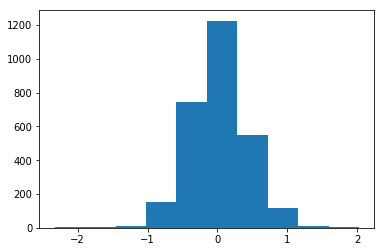

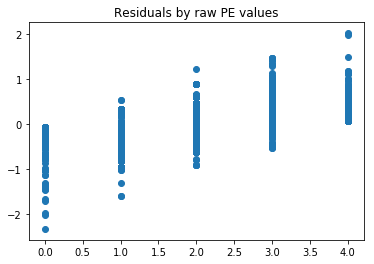

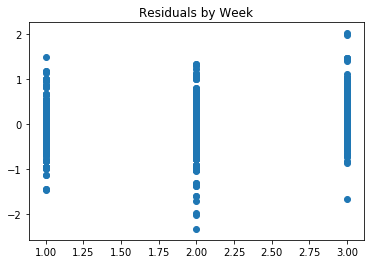

In [51]:
E_long['residual']=ris_result.resid

# Are residuals normally distributed?
plt.hist(E_long['residual'])
plt.show()

# Is variance constant for all values of the outcome?
plt.scatter(E_long['E'],E_long['residual'])
plt.title('Residuals by raw PE values')
plt.show()

# Is variance constant for all values of the predictors?
plt.scatter(E_long['Year'],E_long['residual'])
plt.title('Residuals by Week')
plt.show()

In [ ]:
#Our hypothesis seems likely as our ICC and p value tests are seem good. Our residual distribution also is encouraging.